In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.base import clone
from rfpimp import *
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rf_model = pickle.load(open('random_forest_completion_third_quarter.p', 'rb')) # load the model

In [3]:
# model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=20, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

In [4]:
def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def print_roc_curve(y_test, probabilities, model_type):
    '''
    Calculates and prints a ROC curve given a set of test classes and probabilities from a trained classifier
    '''
    tprs, fprs, thresh = roc_curve(y_test, probabilities)
    plt.figure(figsize=(12,10))
    plt.plot(fprs, tprs, 
         label=model_type, 
         color='red')
    plt.plot([0,1],[0,1], 'k:')
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve AUC: {} Recall: {}".format(roc_auc, recall))
    plt.show()

In [5]:
# X_train = pd.read_csv('../data/processed/first_half/X_train.csv')
# y_train = pd.read_csv('../data/processed/first_half/y_train.csv')
# y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/third_quarter/X_test.csv')

y_test = pd.read_csv('../data/processed/third_quarter/y_test.csv')
y_test = y_test['module_not_completed']

# fill
# X_train.fillna(value = 0, inplace = True)
# X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)

In [6]:
    predictions = rf_model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)
    probas = rf_model.predict_proba(X_test)[:, :1]
    tprs, fprs, thresh = roc_curve(y_test, probas)
    recall = recall_score(y_test, predictions)
    conf_mat = standard_confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

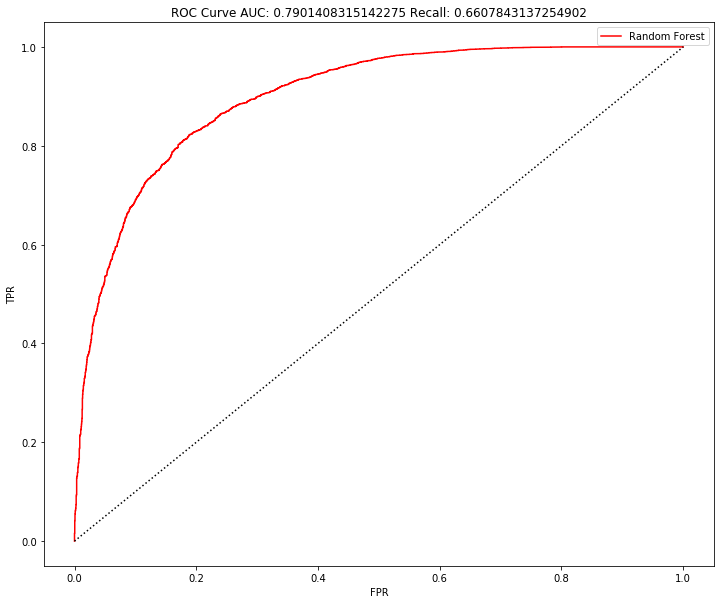

Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Roc Auc: 0.7901408315142275

Recall Score: 0.6607843137254902

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.92      0.88      5093
        True       0.80      0.66      0.73      2550

   micro avg       0.83      0.83      0.83      7643
   macro avg       0.82      0.79      0.80      7643
weighted avg       0.83      0.83      0.83      7643


Confusion Matrix:
 [[1685  410]
 [ 865 4683]]


In [7]:
    print_roc_curve(y_test, probas, 'Random Forest')
    print('Best Model: {}'.format(rf_model))
    print('\nRoc Auc: {}'.format(roc_auc))
    print('\nRecall Score: {}'.format(recall))
    print('\nClassification Report:\n {}'.format(class_report))
    print('\nConfusion Matrix:\n {}'.format(standard_confusion_matrix(y_test, predictions)))

In [8]:
feat_imp = importances(rf_model, X_test, y_test)

In [9]:
feat_imp.sort_values(by='Importance', ascending=False)[0:10]

,Importance
Feature,
avg_score,0.0422
sum_click_quiz,0.0136
sum_days_vle_accessed,0.0124
sum_click_oucontent,0.0054
sum_click_forumng,0.0034
code_module_DDD,0.0034
days_early_first_assessment,0.0032
first_date_vle_accessed,0.0024
sum_click_resource,0.0020


In [10]:
pd.DataFrame(data={'fprs': fprs, 'tprs': tprs, 'Thresholds': thresh}).loc[300:1000:25]

,fprs,tprs,Thresholds
300,0.060784,0.569998,0.839471
325,0.066275,0.587866,0.831248
350,0.073333,0.613391,0.817723
375,0.078824,0.630866,0.809231
400,0.083529,0.653839,0.798138
425,0.090196,0.669939,0.787494
450,0.095686,0.680346,0.780596
475,0.101961,0.693894,0.772099
500,0.107059,0.704300,0.763902
525,0.112941,0.715688,0.754656
